# OS11: Models and Algorithms for Logistic and Transport 


# Osvady Avalos Abreu


## Doctorando en Ingeniería -Mención Procesamiento de Señales e Imágenes 

In [124]:
import pandas as pd
import os
import numpy as np
import scipy.io as sio
from scipy import stats
from math import factorial
import seaborn as sns
from scipy.linalg import eigh,eig,eigvals
from scipy.optimize import linprog
import matplotlib.pyplot as plt
from copy import deepcopy
from itertools import permutations

In [2]:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [3]:
NN=np.matrix([[0,1,1],[0,0,0],[0,1,0]])
NN

matrix([[0, 1, 1],
        [0, 0, 0],
        [0, 1, 0]])

In [4]:
def matrix_nodo_arco(matrix_nodo_nodo):
    
    n,n=matrix_nodo_nodo.shape
    
    NA=np.zeros([n,np.count_nonzero(matrix_nodo_nodo)])
    nodo,arco=NA.shape
    k=0
    for i in range(n):
        for j in range (n):
            if matrix_nodo_nodo[i,j]==1:
                NA[i,k]=1
                NA[j,k]=-1
                k+=1
    return NA       
matrix_nodo_arco(NN)            

array([[ 1.,  1.,  0.],
       [-1.,  0., -1.],
       [ 0., -1.,  1.]])

In [5]:
""" Esta es otra solucion 
 Para probarla hay que dscomentarla 
"""

# def nn2na(NN):
#     idxs = np.argwhere(NN)
#     NA = np.zeros([NN.shape[0],idxs.shape[0]]).astype(int)
    
#     for i, arc in enumerate(idxs):
#         NA[arc[0],i] = 1
#         NA[arc[1],i] = -1

#     return NA

' Esta es otra solucion \n Para probarla hay que dscomentarla \n'

## Resolucion de Rodrigo 

In [6]:
# Matrix treatment:
def nn2na(NN):
    # Get every location where exist an arc:
    idxs = np.argwhere(NN)
    # Preallocate NA matrix, dimension is (nodes, arcs)
    NA = np.zeros([NN.shape[0], idxs.shape[0]]).astype(int)
    C = np.zeros(NA.shape[1])
    # Loop in every arc, complete from (1) to (-1)
    for i, arc in enumerate(idxs):
        # Node arc:
        NA[arc[0], i] = 1 # From
        NA[arc[1], i] = -1 # To

    arc_idxs = [(arc[0], arc[1]) for arc in idxs]

    return NA, arc_idxs



# Shortest path Utils
def get_selected_arcs(arc_idxs, selected_arcs):
    arc = []
    for idx, i in enumerate(selected_arcs):
        if np.isclose(i, 1, rtol=1e-05, atol=1e-08, equal_nan=False): # Vecinity
            arc.append(arc_idxs[idx])
    return arc



# EX1: Basic example SP
## Shortest Path

In [7]:
# IMPORT THE DATA:
NN = np.array([[0, 1, 1, 0, 0, 0],
               [0, 0, 0, 1, 0, 1],
               [0, 0, 0, 0, 1, 0],
               [0, 0, 0, 0, 0, 1],
               [0, 0, 0, 0, 0, 1],
               [0, 0, 0, 0, 0, 0]])

# DATA MANIPULATION:
C = np.array([2, 2, 2, 5, 2, 1, 2])
Aeq, arc_idxs = nn2na(NN)
beq = np.array([1, 0, 0, 0, 0, -1])
bounds = tuple([(0, None) for arcs in range(0, Aeq.shape[1])])

print('## Optimizer inputs ## \n'
      'Cost vector: %s \n '
      'A_eq Node-Arc matrix:\n%s \n'
      'b_eq demand-supply vector: %s \n'
      'Bounds of each X arc variable: %s \n' % (C, Aeq, beq, bounds))

# OPTIMIZE:
res = linprog(C, A_eq=Aeq, b_eq=beq, bounds=bounds)

# GET THE SOLUTION:
selarcs = get_selected_arcs(arc_idxs, res.x)
print('## Results ##')
print('The raw solution will be: %s' % res.x)
print('The arcs that make the shortest path will be (from, to): %s' % selarcs)
print('The minimum cost will be: %0.2f ' % res.fun)

## Optimizer inputs ## 
Cost vector: [2 2 2 5 2 1 2] 
 A_eq Node-Arc matrix:
[[ 1  1  0  0  0  0  0]
 [-1  0  1  1  0  0  0]
 [ 0 -1  0  0  1  0  0]
 [ 0  0 -1  0  0  1  0]
 [ 0  0  0  0 -1  0  1]
 [ 0  0  0 -1  0 -1 -1]] 
b_eq demand-supply vector: [ 1  0  0  0  0 -1] 
Bounds of each X arc variable: ((0, None), (0, None), (0, None), (0, None), (0, None), (0, None), (0, None)) 

## Results ##
The raw solution will be: [1.00000000e+00 1.07463814e-10 1.00000000e+00 4.87243456e-11
 1.07463814e-10 1.00000000e+00 1.07463814e-10]
The arcs that make the shortest path will be (from, to): [(0, 1), (1, 3), (3, 5)]
The minimum cost will be: 5.00 


In [8]:
res


     con: array([-1.10423448e-10, -1.10419895e-10, -3.70576914e-22, -5.77315973e-15,
        0.00000000e+00,  2.20849117e-10])
     fun: 5.000000001088295
 message: 'Optimization terminated successfully.'
     nit: 4
   slack: array([], dtype=float64)
  status: 0
 success: True
       x: array([1.00000000e+00, 1.07463814e-10, 1.00000000e+00, 4.87243456e-11,
       1.07463814e-10, 1.00000000e+00, 1.07463814e-10])

# Shortest Path
# EX2: Basic example SP

In [9]:

# IMPORT THE DATA:
NN = np.array([[0, 1, 1, 0, 0, 0],
               [0, 0, 0, 1, 0, 1],
               [0, 0, 0, 0, 1, 0],
               [0, 0, 0, 0, 0, 1],
               [0, 0, 0, 0, 0, 1],
               [0, 0, 0, 0, 0, 0]])

# DATA MANIPULATION:
C = np.array([2, 1, 2, 5, 2, 1, 2])
Aeq, arc_idxs = nn2na(NN)
beq = np.array([1, 0, 0, 0, 0, -1])
bounds = tuple([(0, None) for arcs in range(0, Aeq.shape[1])])

print('## Optimizer inputs ## \n'
      'Cost vector: %s \n '
      'A_eq Node-Arc matrix:\n%s \n'
      'b_eq demand-supply vector: %s \n'
      'Bounds of each X arc variable: %s \n' % (C, Aeq, beq, bounds))

for name_method in 'interior-point', 'revised simplex':
    # OPTIMIZE:
    res = linprog(C, A_eq=Aeq, b_eq=beq, bounds=bounds, method=name_method)

    # GET THE SOLUTION:
    selarcs = get_selected_arcs(arc_idxs, res.x)
    print('\n ## Results for %s ## ' % name_method)
    print('The raw solution will be: %s' % res.x)
    print('The arcs that make the shortest path will be (from, to): %s' % selarcs)
    print('The minimum cost will be: %0.2f ' % res.fun)

## Optimizer inputs ## 
Cost vector: [2 1 2 5 2 1 2] 
 A_eq Node-Arc matrix:
[[ 1  1  0  0  0  0  0]
 [-1  0  1  1  0  0  0]
 [ 0 -1  0  0  1  0  0]
 [ 0  0 -1  0  0  1  0]
 [ 0  0  0  0 -1  0  1]
 [ 0  0  0 -1  0 -1 -1]] 
b_eq demand-supply vector: [ 1  0  0  0  0 -1] 
Bounds of each X arc variable: ((0, None), (0, None), (0, None), (0, None), (0, None), (0, None), (0, None)) 


 ## Results for interior-point ## 
The raw solution will be: [5.29117485e-01 4.70882515e-01 5.29117485e-01 1.92890873e-11
 4.70882515e-01 5.29117485e-01 4.70882515e-01]
The arcs that make the shortest path will be (from, to): []
The minimum cost will be: 5.00 

 ## Results for revised simplex ## 
The raw solution will be: [0. 1. 0. 0. 1. 0. 1.]
The arcs that make the shortest path will be (from, to): [(0, 2), (2, 4), (4, 5)]
The minimum cost will be: 5.00 


# Shortest Path
# EX3 Basic example SP with Dijkstra algorithm

In [10]:

# graph = {'s': {'1': 2, '2': 2},
#          '1': {'3': 2, 't': 5,'s':2}, '2': {'4': 2,'s':2},
#          '3': {'t': 1,'1':2}, '4': {'t': 2,'2':2},'t':{'3':1,'4':2,'1':5} }

In [11]:

def search(source, target, graph, costs, parents):
    
    new_graph=deepcopy(graph)
    new_cost=deepcopy(costs)
    
    nextNode = source
    
    while nextNode != target:
        
        for neighbor in new_graph[nextNode]:
            
            if new_graph[nextNode][neighbor] + new_cost[nextNode] < new_cost[neighbor]:
                
                new_cost[neighbor] = new_graph[nextNode][neighbor] + new_cost[nextNode]
                
                parents[neighbor] = nextNode
   
            del new_graph[neighbor][nextNode]
        del new_cost[nextNode]
        
        res =  [key for key in new_cost if 
        all(new_cost[temp] >= new_cost[key] 
        for temp in new_cost)] 

        nextNode=res[0]      
    return parents

def backpedal(source, target, searchResult,graph):
    
    node = target
    
    backpath = [target]
    
    path = []
    
    while node != source:
        
        backpath.append(searchResult[node])
        
        node = searchResult[node]
        
    for i in range(len(backpath)):
        
        path.append(backpath[-i - 1])
    
    costo_total=0
    for i in range (len(path)-1):
        costo_total+=graph[path[i]][path[i+1]]

    return path,costo_total

In [12]:
graph = {'s': {'2': 2, '3': 2},
         
         '2': {'4': 2, 't': 5,'s':2}, 
         
         '3': {'5': 2,'s':2},
         
         '4': {'t': 1,'2':2},
         
         '5': {'t': 2,'3':2},
         
         't':{'4':1,'5':2,'2':5} }


costs = {'s': 0, '2': np.inf, '3': np.inf, '4': np.inf, '5': np.inf, 't': np.inf}

parents = {}

In [13]:
result = search('s', 't', graph, costs, parents)

# print('parent dictionary={}'.format(result))
print('shorth_path={}'.format(backpedal('s', 't', result,graph)[0]))
print('total_cost = {}'.format(backpedal('s', 't', result,graph)[1]))

shorth_path=['s', '2', '4', 't']
total_cost = 5


# Maximum Flow
# EX4: Basic example MF

In [14]:
# Maximum flow Utils
def get_usage_string(arc_idxs, res_flow, capacity):
    return {arc: '%s/%s' % (flow, cap) for arc, flow, cap in zip(arc_idxs, res_flow, capacity)}

def get_min_cut(arc_idxs, np_res_flow, np_capacity):
    np_capacity = np.where(np_capacity == None, 999, np_capacity)

    idxs = np.argwhere((np_res_flow - np_capacity) == 0)
    return [arc_idxs[i[0]] for i in idxs]

In [15]:
# IMPORT THE DATA:
NN = np.array([[0, 1, 1, 0, 0, 0],
               [0, 0, 0, 1, 0, 1],
               [0, 0, 0, 0, 1, 0],
               [0, 0, 0, 0, 0, 1],
               [0, 0, 0, 0, 0, 1],
               [1, 0, 0, 0, 0, 0]])

# DATA MANIPULATION:
Aeq, arc_idxs = nn2na(NN)
C = np.array([0, 0, 0, 0, 0, 0, 0, -1])
beq = np.array([0, 0, 0, 0, 0, 0])
max_q = [7, 1, 2, 3, 2, 1, 2, None]
bounds = tuple([(0, max_q[arcs]) for arcs in range(0, Aeq.shape[1])])

print('## Optimizer inputs ## \n'
      'Cost vector: %s \n '
      'A_eq Node-Arc matrix:\n%s \n'
      'b_eq demand-supply vector: %s \n'
      'Bounds of each X arc variable: %s \n' % (C, Aeq, beq, bounds))

# OPTIMIZE:
res = linprog(C, A_eq=Aeq, b_eq=beq, bounds=bounds, method='simplex')

# GET THE SOLUTION:
usage = get_usage_string(arc_idxs, res.x.astype(int), max_q)
min_cut = get_min_cut(arc_idxs, res.x, np.array(max_q))
max_flow = res.fun * -1
print('## Results ## \n'
      'The usage of each arc will be (from, to): %s \n'
      'The arcs that produce the minimum cut (from, to): %s \n'
      'The maximum flow will be: %0.2f ' % (usage, min_cut , max_flow))

## Optimizer inputs ## 
Cost vector: [ 0  0  0  0  0  0  0 -1] 
 A_eq Node-Arc matrix:
[[ 1  1  0  0  0  0  0 -1]
 [-1  0  1  1  0  0  0  0]
 [ 0 -1  0  0  1  0  0  0]
 [ 0  0 -1  0  0  1  0  0]
 [ 0  0  0  0 -1  0  1  0]
 [ 0  0  0 -1  0 -1 -1  1]] 
b_eq demand-supply vector: [0 0 0 0 0 0] 
Bounds of each X arc variable: ((0, 7), (0, 1), (0, 2), (0, 3), (0, 2), (0, 1), (0, 2), (0, None)) 

## Results ## 
The usage of each arc will be (from, to): {(0, 1): '4/7', (0, 2): '1/1', (1, 3): '1/2', (1, 5): '3/3', (2, 4): '1/2', (3, 5): '1/1', (4, 5): '1/2', (5, 0): '5/None'} 
The arcs that produce the minimum cut (from, to): [(0, 2), (1, 5), (3, 5)] 
The maximum flow will be: 5.00 


In [16]:
bounds

((0, 7), (0, 1), (0, 2), (0, 3), (0, 2), (0, 1), (0, 2), (0, None))

In [17]:
res.x

array([4., 1., 1., 3., 1., 1., 1., 5.])

# Maximum Flow
# EX5: Basic example MF with Ford Fulkerson algorithm

In [18]:
"""
Description:
    (1) Start with initial flow as 0;
    (2) Choose augmenting path from source to sink and add path to flow;
"""
 
def BFS(graph, s, t, parent):
    # Return True if there is node that has not iterated.
    visited = [False] * len(graph)
    queue = []
    queue.append(s)
    visited[s] = True
 
    while queue:
        u = queue.pop(0)
        for ind in range(len(graph[u])):
            if visited[ind] is False and graph[u][ind] > 0:
                queue.append(ind)
                visited[ind] = True
                parent[ind] = u
 
    return True if visited[t] else False

def FordFulkerson(graph, source, sink):
    
    # This array is filled by BFS and to store path
    
    parent = [-1] * (len(graph))
    max_flow = 0
    while BFS(graph, source, sink, parent):
        path_flow = float("Inf")
        s = sink
 
        while s != source:
            # Find the minimum value in select path
            path_flow = min(path_flow, graph[parent[s]][s])
            s = parent[s]
 
        max_flow += path_flow
        v = sink
 
        while v != source:
            u = parent[v]
            graph[u][v] -= path_flow
            graph[v][u] += path_flow
            v = parent[v]
    return max_flow
 
 
graph = [
    [0, 7, 1, 0, 0, 0],
    [0, 0, 0, 2, 0, 3],
    [0, 0, 0, 0, 2, 0],
    [0, 0,0 , 0, 0, 1],
    [0, 0, 0, 0, 0, 2],
    [0, 0, 0, 0, 0, 0],]
 
source, sink = 0,5
print(FordFulkerson(graph, source, sink))

5


# Transport
# EX6: Transport model example

In [19]:
# IMPORT THE DATA:
NN = np.array([[ 0, 0, 0, 1, 1],
               [0, 0, 0, 1, 1],
               [0, 0, 0, 1, 1],
               [0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0]])

# DATA MANIPULATION:
Aeq, arc_idxs = nn2na(NN)

C = np.array([10, 20, 10, 10, 10, 30])
beq = np.array([10, 20, 15, -25, -20])
               
bounds = tuple([(0, None) for arcs in range(0, Aeq.shape[1])])

print('## Optimizer inputs ## \n'
      'Cost vector: %s \n '
      'A_eq Node-Arc matrix:\n%s \n'
      'b_eq demand-supply vector: %s \n'
      'Bounds of each X arc variable: %s \n' % (C, Aeq, beq, bounds))

# OPTIMIZE:
res = linprog(C, A_eq=Aeq, b_eq=beq, bounds=bounds, method='simplex')



max_flow = res.fun * -1
print('## Results ## \n'
      'The maximum flow will be: %0.2f ' % ( max_flow))


# GET THE SOLUTION:


print('The raw solution will be: %s' % res.x)


## Optimizer inputs ## 
Cost vector: [10 20 10 10 10 30] 
 A_eq Node-Arc matrix:
[[ 1  1  0  0  0  0]
 [ 0  0  1  1  0  0]
 [ 0  0  0  0  1  1]
 [-1  0 -1  0 -1  0]
 [ 0 -1  0 -1  0 -1]] 
b_eq demand-supply vector: [ 10  20  15 -25 -20] 
Bounds of each X arc variable: ((0, None), (0, None), (0, None), (0, None), (0, None), (0, None)) 

## Results ## 
The maximum flow will be: -450.00 
The raw solution will be: [10.  0.  0. 20. 15.  0.]


# Dynamic Network Flows
# EX7: Emergency Evacuation Plan

In [20]:
# IMPORT THE DATA:

NN = np.array([
    [0,     1, 1, 1, 1, 1, 1,   0, 0, 0, 0, 0, 0,   0, 0, 0, 0, 0, 0,   0, 0, 0, 0, 0, 0,   0],
    
    [0,     0, 0, 0, 0, 0, 0,   0, 1, 0, 0, 0, 0,   0, 0, 0, 1, 0, 0,   0, 0, 0, 0, 0, 0,   0],
    [0,     0, 0, 0, 0, 0, 0,   0, 0, 1, 0, 0, 0,   0, 0, 0, 0, 1, 0,   0, 0, 0, 0, 0, 0,   0],
    [0,     0, 0, 0, 0, 0, 0,   0, 0, 0, 1, 0, 0,   0, 0, 0, 0, 0, 1,   0, 0, 0, 0, 0, 0,   0],
    [0,     0, 0, 0, 0, 0, 0,   0, 0, 0, 0, 1, 0,   0, 0, 0, 0, 0, 0,   0, 0, 0, 0, 0, 0,   0],
    [0,     0, 0, 0, 0, 0, 0,   0, 0, 0, 0, 0, 1,   0, 0, 0, 0, 0, 0,   0, 0, 0, 0, 0, 0,   0],
    [0,     0, 0, 0, 0, 0, 0,   0, 0, 0, 0, 0, 0,   0, 0, 0, 0, 0, 0,   0, 0, 0, 0, 0, 0,   0],
    
    [0,     0, 0, 0, 0, 0, 0,   0, 0, 0, 0, 0, 0,   0, 0, 1, 0, 0, 0,   0, 1, 0, 0, 0, 0,   0],
    [0,     0, 0, 0, 0, 0, 0,   0, 0, 0, 0, 0, 0,   0, 0, 0, 1, 0, 0,   0, 0, 1, 0, 0, 0,   0],
    [0,     0, 0, 0, 0, 0, 0,   0, 0, 0, 0, 0, 0,   0, 0, 0, 0, 1, 0,   0, 0, 0, 1, 0, 0,   0],
    [0,     0, 0, 0, 0, 0, 0,   0, 0, 0, 0, 0, 0,   0, 0, 0, 0, 0, 1,   0, 0, 0, 0, 1, 0,   0],
    [0,     0, 0, 0, 0, 0, 0,   0, 0, 0, 0, 0, 0,   0, 0, 0, 0, 0, 0,   0, 0, 0, 0, 0, 1,   0],
    [0,     0, 0, 0, 0, 0, 0,   0, 0, 0, 0, 0, 0,   0, 0, 0, 0, 0, 0,   0, 0, 0, 0, 0, 0,   0],
    
    [0,     0, 0, 0, 0, 0, 0,   0, 0, 0, 0, 0, 0,   0, 0, 0, 0, 0, 0,   0, 1, 0, 0, 0, 0,   0],
    [0,     0, 0, 0, 0, 0, 0,   0, 0, 0, 0, 0, 0,   0, 0, 0, 0, 0, 0,   0, 0, 1, 0, 0, 0,   0],
    [0,     0, 0, 0, 0, 0, 0,   0, 0, 0, 0, 0, 0,   0, 0, 0, 0, 0, 0,   0, 0, 0, 1, 0, 0,   0],
    [0,     0, 0, 0, 0, 0, 0,   0, 0, 0, 0, 0, 0,   0, 0, 0, 0, 0, 0,   0, 0, 0, 0, 1, 0,   0],
    [0,     0, 0, 0, 0, 0, 0,   0, 0, 0, 0, 0, 0,   0, 0, 0, 0, 0, 0,   0, 0, 0, 0, 0, 1,   0],
    [0,     0, 0, 0, 0, 0, 0,   0, 0, 0, 0, 0, 0,   0, 0, 0, 0, 0, 0,   0, 0, 0, 0, 0, 0,   0],
    
    [0,     0, 0, 0, 0, 0, 0,   0, 0, 0, 0, 0, 0,   0, 0, 0, 0, 0, 0,   0, 0, 0, 0, 0, 0,   1],
    [0,     0, 0, 0, 0, 0, 0,   0, 0, 0, 0, 0, 0,   0, 0, 0, 0, 0, 0,   0, 0, 0, 0, 0, 0,   1],
    [0,     0, 0, 0, 0, 0, 0,   0, 0, 0, 0, 0, 0,   0, 0, 0, 0, 0, 0,   0, 0, 0, 0, 0, 0,   1],
    [0,     0, 0, 0, 0, 0, 0,   0, 0, 0, 0, 0, 0,   0, 0, 0, 0, 0, 0,   0, 0, 0, 0, 0, 0,   1],
    [0,     0, 0, 0, 0, 0, 0,   0, 0, 0, 0, 0, 0,   0, 0, 0, 0, 0, 0,   0, 0, 0, 0, 0, 0,   1],
    [0,     0, 0, 0, 0, 0, 0,   0, 0, 0, 0, 0, 0,   0, 0, 0, 0, 0, 0,   0, 0, 0, 0, 0, 0,   1],
    
    [1,     0, 0, 0, 0, 0, 0,   0, 0, 0, 0, 0, 0,   0, 0, 0, 0, 0, 0,   0, 0, 0, 0, 0, 0,   0],
])

In [21]:
# DATA MANIPULATION:
Aeq, arc_idxs = nn2na(NN)

C = np.zeros((1,Aeq.shape[1]))
C[0,Aeq.shape[1]-1]=-1

beq = np.zeros((1,Aeq.shape[0]))

max_q = [np.inf, np.inf , np.inf, np.inf, np.inf,np.inf,
         5,10,5,10,5,10,5,5,
         6,3,6,3,6,3,6,3,3,
         3,3,3,3,3,
         np.inf, np.inf , np.inf, np.inf, np.inf,np.inf,\
         np.inf]

bounds = tuple([(0, max_q[arcs]) for arcs in range(0, Aeq.shape[1])])

# print('## Optimizer inputs ## \n'
#       'Cost vector: %s \n '
#       'A_eq Node-Arc matrix:\n%s \n'
#       'b_eq demand-supply vector: %s \n'
#       'Bounds of each X arc variable: %s \n' % (C, Aeq, beq, bounds))

# OPTIMIZE:
res = linprog(C, A_eq=Aeq, b_eq=beq, bounds=bounds, method='simplex')

# GET THE SOLUTION:
usage = get_usage_string(arc_idxs, res.x.astype(int), max_q)
min_cut = get_min_cut(arc_idxs, res.x, np.array(max_q))
max_flow = res.fun * -1
print('## Results ## \n'
      'The usage of each arc will be (from, to): %s \n'
      'The arcs that produce the minimum cut (from, to): %s \n'
      "\n"
      "\n"
      'The maximum flow will be: %0.2f ' % (usage, min_cut , max_flow))

## Results ## 
The usage of each arc will be (from, to): {(0, 1): '6/inf', (0, 2): '6/inf', (0, 3): '3/inf', (0, 4): '3/inf', (0, 5): '0/inf', (0, 6): '0/inf', (1, 8): '5/5', (1, 16): '1/10', (2, 9): '5/5', (2, 17): '1/10', (3, 10): '3/5', (3, 18): '0/10', (4, 11): '3/5', (5, 12): '0/5', (7, 15): '0/6', (7, 20): '0/3', (8, 16): '2/6', (8, 21): '3/3', (9, 17): '2/6', (9, 22): '3/3', (10, 18): '0/6', (10, 23): '3/3', (11, 24): '3/3', (13, 20): '0/3', (14, 21): '0/3', (15, 22): '0/3', (16, 23): '3/3', (17, 24): '3/3', (19, 25): '0/inf', (20, 25): '0/inf', (21, 25): '3/inf', (22, 25): '3/inf', (23, 25): '6/inf', (24, 25): '6/inf', (25, 0): '18/inf'} 
The arcs that produce the minimum cut (from, to): [(1, 8), (2, 9), (8, 21), (9, 22), (10, 23), (11, 24), (16, 23), (17, 24)] 


The maximum flow will be: 18.00 


In [22]:
for name_method in 'interior-point', 'revised simplex', 'simplex':
    # OPTIMIZE:
    res = linprog(C, A_eq=Aeq, b_eq=beq, bounds=bounds, method=name_method)

    # GET THE SOLUTION:
    usage = get_usage_string(arc_idxs, res.x.astype(int), max_q)
    min_cut = get_min_cut(arc_idxs, res.x, np.array(max_q))
    max_flow = res.fun * -1
    print('\n ## Results for %s ## ' % name_method)
    print('The maximum flow will be: %0.2f ' % (max_flow))



 ## Results for interior-point ## 
The maximum flow will be: 18.00 

 ## Results for revised simplex ## 
The maximum flow will be: 18.00 

 ## Results for simplex ## 
The maximum flow will be: 18.00 


# Transshipment problem
# EX8

In [23]:
## La matriz esta estructurada de esta forma 

##  P1A P1B P2A P2B P3A P3B     S1A S1B  S2A S2B         V1A V1B  V2A V2B  V3A V3B 


NN= np.array([

    [     0, 0, 0, 0, 0, 0,         1, 0, 1, 0,                  0, 0, 0, 0, 0, 0,   ],
    [     0, 0, 0, 0, 0, 0,         0, 1, 0, 1,                  0, 0, 0, 0, 0, 0,   ],
    [     0, 0, 0, 0, 0, 0,         1, 0, 1, 0,                  0, 0, 0, 0, 0, 0,   ],
    [     0, 0, 0, 0, 0, 0,         0, 1, 0, 1,                  0, 0, 0, 0, 0, 0,   ],
    [     0, 0, 0, 0, 0, 0,         1, 0, 1, 0,                  0, 0, 0, 0, 0, 0,   ],
    [     0, 0, 0, 0, 0, 0,         0, 1, 0, 1,                  0, 0, 0, 0, 0, 0,   ],
    
    [     0, 0, 0, 0, 0, 0,         0, 0, 0, 0,                  1, 0, 1, 0, 1, 0,   ],
    [     0, 0, 0, 0, 0, 0,         0, 0, 0, 0,                  0, 1, 0, 1, 0, 1,   ],
    [     0, 0, 0, 0, 0, 0,         0, 0, 0, 0,                  1, 0, 1, 0, 1, 0,   ],
    [     0, 0, 0, 0, 0, 0,         0, 0, 0, 0,                  0, 1, 0, 1, 0, 1,   ],
   
    
    [     0, 0, 0, 0, 0, 0,         0, 0, 0, 0,                  0, 0, 0, 0, 0, 0,   ],
    [     0, 0, 0, 0, 0, 0,         0, 0, 0, 0,                  0, 0, 0, 0, 0, 0,   ],
    [     0, 0, 0, 0, 0, 0,         0, 0, 0, 0,                  0, 0, 0, 0, 0, 0,   ],
    [     0, 0, 0, 0, 0, 0,         0, 0, 0, 0,                  0, 0, 0, 0, 0, 0,   ],
    [     0, 0, 0, 0, 0, 0,         0, 0, 0, 0,                  0, 0, 0, 0, 0, 0,   ],
    [     0, 0, 0, 0, 0, 0,         0, 0, 0, 0,                  0, 0, 0, 0, 0, 0,   ], 


])

In [24]:
NA, arc_idxs = nn2na(NN)
NA.shape

(16, 24)

In [25]:

# DATA MANIPULATION:

NA, arc_idxs = nn2na(NN)
m,n=NA.shape

A=np.zeros((m,n))
A[0:6,:]=NA[0:6,:]


Aeq=np.zeros((m,n))
Aeq[6:m,:]=NA[6:m,:]

C = np.array([100,100,  200,200   ,150,150,       150,150,   200,200    ,100,100,
              
              100,150 ,200,     200,150,100,      100,150 ,200,   200,150,100,])


b_A = np.array([20,30,10,40,30,10,  0,0,0,0,  0,0,0,0,0,0])

beq = np.array([0,0,0,0,0,0,  0,0,0,0,  -30,-40,-10,-20,-20,-20])


               
bounds = tuple([(0, None) for arcs in range(0, NA.shape[1])])

print('## Optimizer inputs ## \n'
      'Cost vector: %s \n '
      'A Node-Arc matrix:\n%s \n'
      'b_A offert-supply vector: %s \n'
      'Bounds of each X arc variable: %s \n' % (C, A, b_A, bounds))




print('## Optimizer inputs ## \n'
      'Cost vector: %s \n '
      'A_eq Node-Arc matrix:\n%s \n'
      'b_eq demand-supply vector: %s \n'
      'Bounds of each X arc variable: %s \n' % (C, Aeq, beq, bounds))



# OPTIMIZE:
res = linprog(C,  A_ub=A, b_ub=b_A,   A_eq=Aeq, b_eq=beq    , bounds=bounds, method='simplex')



max_flow = res.fun * -1
print('## Results ## \n'
      'The maximum flow will be: %0.2f ' % ( max_flow))



# GET THE SOLUTION:

print('The raw solution will be: %s' % res.x)

## Optimizer inputs ## 
Cost vector: [100 100 200 200 150 150 150 150 200 200 100 100 100 150 200 200 150 100
 100 150 200 200 150 100] 
 A Node-Arc matrix:
[[1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0

# Shortest path with time constraints
# EX09: direct LP approach

In [26]:
# IMPORT THE DATA:
NN = np.array([[0, 1, 1, 0, 0, 0],
               [0, 0, 0, 1, 0, 1],
               [0, 0, 0, 0, 1, 0],
               [0, 0, 0, 0, 0, 1],
               [0, 0, 0, 0, 0, 1],
               [0, 0, 0, 0, 0, 0]])

# DATA MANIPULATION:

C = np.array([2,1,2,5,2,1,2])

Aeq, arc_idxs = nn2na(NN)

beq = np.array([1, 0, 0, 0, 0, -1])

t=np.matrix([[3,1,3,1,3,3,5]])

T=[8,9]

bounds = tuple([(0, None) for arcs in range(0, Aeq.shape[1])])

print('## Optimizer inputs ## \n'
      'Cost vector: %s \n '
      'A_eq Node-Arc matrix:\n%s \n'
      'b_eq demand-supply vector: %s \n'
      'Bounds of each X arc variable: %s \n' % (C, Aeq, beq, bounds))


for i in T:
    
    # OPTIMIZE:
    
    res = linprog(C,    A_ub=t, b_ub=i  ,  A_eq=Aeq, b_eq=beq, bounds=bounds,method="simplex")

    # GET THE SOLUTION:
    selarcs = get_selected_arcs(arc_idxs, res.x)
    print('## Results ## \n '
           "for_T= %s" % i)
    print('The raw solution will be: %s' % res.x)
    
    
    print('The arcs that make the shortest path will be (from, to): %s' % selarcs)
    
    
    print('The minimum cost will be: %0.2f  \n' % res.fun)

## Optimizer inputs ## 
Cost vector: [2 1 2 5 2 1 2] 
 A_eq Node-Arc matrix:
[[ 1  1  0  0  0  0  0]
 [-1  0  1  1  0  0  0]
 [ 0 -1  0  0  1  0  0]
 [ 0  0 -1  0  0  1  0]
 [ 0  0  0  0 -1  0  1]
 [ 0  0  0 -1  0 -1 -1]] 
b_eq demand-supply vector: [ 1  0  0  0  0 -1] 
Bounds of each X arc variable: ((0, None), (0, None), (0, None), (0, None), (0, None), (0, None), (0, None)) 

## Results ## 
 for_T= 8
The raw solution will be: [0.2 0.8 0.  0.2 0.8 0.  0.8]
The arcs that make the shortest path will be (from, to): []
The minimum cost will be: 5.40  

## Results ## 
 for_T= 9
The raw solution will be: [0. 1. 0. 0. 1. 0. 1.]
The arcs that make the shortest path will be (from, to): [(0, 2), (2, 4), (4, 5)]
The minimum cost will be: 5.00  



## Para T=8 no encuentra un camino que minimice el costo 

# Shortest path with time constraints
# EX10: Lagrangian Relaxation

## Results ## 
 
 T<= 8 

The raw solution will be: [0. 1. 0. 0. 1. 0. 1.]
The arcs that make the shortest path will be (from, to): [(0, 2), (2, 4), (4, 5)]
The minimum cost will be: 8.57  

The optimum lagrangian multipliers λ  is : 0.40 
The optimum lagrangian L(λ)  is : 5.40 


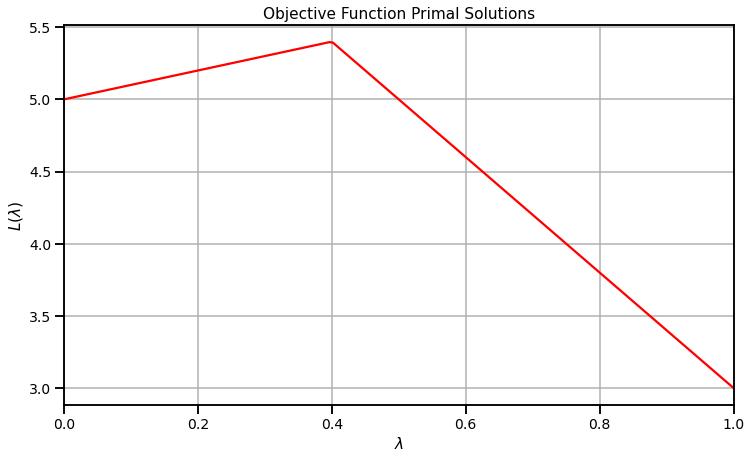

In [108]:
# IMPORT THE DATA:
NN = np.array([[0, 1, 1, 0, 0, 0],
               [0, 0, 0, 1, 0, 1],
               [0, 0, 0, 0, 1, 0],
               [0, 0, 0, 0, 0, 1],
               [0, 0, 0, 0, 0, 1],
               [0, 0, 0, 0, 0, 0]])


# DATA MANIPULATION:

C = np.matrix([2,1,2,5,2,1,2])

Aeq, arc_idxs = nn2na(NN)

beq = np.array([1, 0, 0, 0, 0, -1])

t=np.matrix([[3,1,3,1,3,3,5]])

T=8

lambda_=np.linspace(0,1,200)
bounds = tuple([(0, None) for arcs in range(0, Aeq.shape[1])])


Lagrange=[]
for i in lambda_:
    
    # OPTIMIZE:
    C_monio=(C.T +i*t.T).T
    
    res = linprog(C_monio, A_eq=Aeq, b_eq=beq, bounds=bounds,method="simplex")
    
    Lagrange.append(res.fun - i*T)
       
 
#GET THE SOLUTION:

# OPTIMUM:
lamda_optimum=lambda_[np.where(Lagrange==np.max(Lagrange))[0][0]]

C_monio=(C.T +lamda_optimum *t.T).T

res = linprog(C_monio, A_eq=Aeq, b_eq=beq, bounds=bounds,method="simplex")


Lagrange_optimu =res.fun - lamda_optimum*T

selarcs = get_selected_arcs(arc_idxs, res.x)





print('## Results ## \n '
       "\n T<= %s \n" % T)

print('The raw solution will be: %s' % res.x)


print('The arcs that make the shortest path will be (from, to): %s' % selarcs)


print('The minimum cost will be: %0.2f  \n' % res.fun)

print("The optimum lagrangian multipliers λ  is : %0.2f " % lamda_optimum)

print("The optimum lagrangian L(λ)  is : %0.2f " % Lagrange_optimu)


sns.set_context("talk", font_scale=0.85)

plt.figure(figsize=(12, 7))

plt.plot(lambda_,Lagrange,color="red")
           
plt.grid()
plt.title('Objective Function Primal Solutions')

plt.ylabel('$L(\lambda )$')
           
plt.xlabel('$ \lambda $')


plt.xlim([0,1])

plt.show()


# Shortest path with time constraints
# EX11: Lagrangian Relaxation with Subgradient Method

In [ ]:
# IMPORT THE DATA:
NN = np.array([[0, 1, 1, 0, 0, 0],
               [0, 0, 0, 1, 0, 1],
               [0, 0, 0, 0, 1, 0],
               [0, 0, 0, 0, 0, 1],
               [0, 0, 0, 0, 0, 1],
               [0, 0, 0, 0, 0, 0]])


# DATA MANIPULATION:

C = np.matrix([2,1,2,5,2,1,2])

Aeq, arc_idxs = nn2na(NN)

beq = np.array([1, 0, 0, 0, 0, -1])

t=np.matrix([[3,1,3,1,3,3,5]])

T=8

lambda_=np.linspace(0,1,200)
bounds = tuple([(0, None) for arcs in range(0, Aeq.shape[1])])

In [181]:
T=8

lambda_i=0
tol=10**-3
diff=np.inf
i=1


while diff >tol:
    
    # OPTIMIZE:
    C_monio=(C.T +lambda_i * t.T).T
    
    res = linprog(C_monio, A_eq=Aeq, b_eq=beq, bounds=bounds,method="simplex")
    
    Lagrange= res.fun - lambda_i*T
    
    
    gradiente=( t @ res.x  -T)[0,0]
    
    
    step=1/i
    
    
    lambda_0=lambda_i
    
    lambda_i = lambda_0 + step*gradiente
    
    lambda_i=max(0,lambda_i)
    
    diff = lambda_i - lambda_0
    
    i+=1
    
print("The optimum lagrangian multipliers λ  is %0.2f :" % lambda_i )

print("The optimum lagrangian L(λ)  is : %0.2f " % Lagrange)

The optimum lagrangian multipliers λ  is 0.00 :
The optimum lagrangian L(λ)  is : 3.00 


In [182]:
lambda_i

0

In [183]:
Lagrange

3.0